In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
from sklearn.neighbors import LocalOutlierFactor

前提假设：
1、y与特征x之间得关系是连续的
2、在特征空间中，任意一点得观测值与真实值之间的误差大小E与发生的概率P呈负相关关系

这样处理数据的最终效果，填充了样本后，针对在特征空间中距离较为集中的样本，极大减小了真实值与观测值之间的误差，减小了噪音对预测的负面影响。
随着有效样本量的增加，根据可学习理论，可以适应更复杂的模型，避免过拟合

In [2]:
def train(x_train,y_train,spoches):
        index_spoches = np.zeros(len(x_train)-len(x_train)%spoches)
        index_list = list(range(0,len(x_train)))
        for i in range(len(x_train)-len(x_train)%spoches):
            index = np.random.choice(index_list)
            index_spoches[i] = index
            index_list.remove(index)
        index_spoches = index_spoches.reshape(spoches,int((len(x_train)-(len(x_train)%spoches))/spoches)).astype(int)
        return index_spoches

Text(0, 0.5, 'Y')

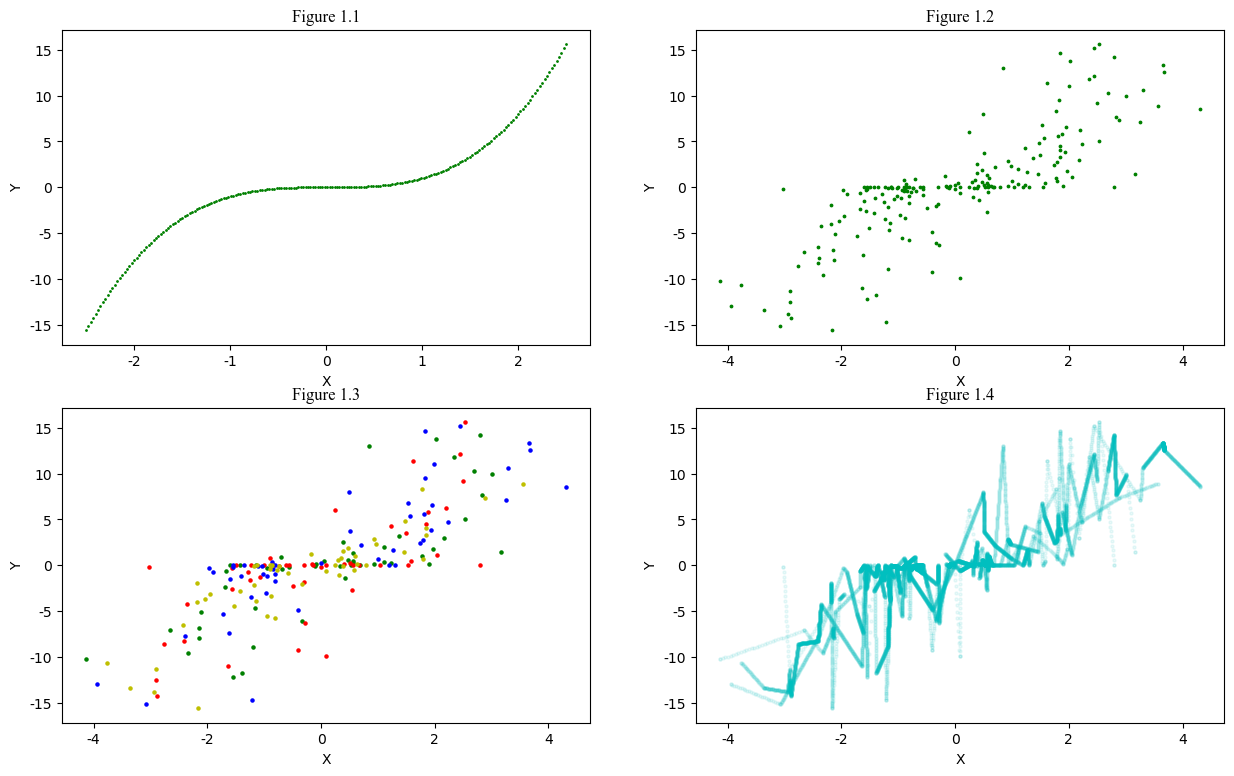

In [55]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(15,9))
n = 200
x = np.linspace(2.5,-2.5,n)
y = x**3
axes[0,0].scatter(x,y,color="green",s=1)
axes[0,0].set_title("Figure 1.1",size=12,fontproperties='Times New Roman')
axes[0,0].set_xlabel("X")
axes[0,0].set_ylabel("Y")
x1 = x+np.random.normal(0,1,n)
axes[0,1].scatter(x1,y,color="green",s=3)
axes[0,1].set_title("Figure 1.2",size=12,fontproperties='Times New Roman')
axes[0,1].set_xlabel("X")
axes[0,1].set_ylabel("Y")

spoches = 4
index = train(x1,y,spoches)
a = ["green","red","b","y"]
for i in range(4):
    index1 = np.argsort(x1[index[i]])
    axes[1,0].scatter(x1[index[i][index1]],y[index[i][index1]],color=a[i],s=5)
axes[1,0].set_title("Figure 1.3",size=12,fontproperties='Times New Roman')
axes[1,0].set_xlabel("X")
axes[1,0].set_ylabel("Y")

x_point=[]
y_point=[]
for k in range(spoches):
    x_set = x1[index[k]]
    y_set = y[index[k]]
    sort_index = np.argsort(x_set)
    for i in range(len(x_set)):
        if i == len(x_set)-1:
            continue
        x_y_set = np.vstack((x_set,y_set)).T
        # cha = 100*(x_set[sort_index[i+1]]-x_set[sort_index[i]])
        cha = 10*(np.linalg.norm(x_y_set[i]-x_y_set[i+1],ord=2,axis=0))
        x_point.append(np.linspace(x_set[sort_index[i]],x_set[sort_index[i+1]],int(cha)))
        y_point.append(np.linspace(y_set[sort_index[i]],y_set[sort_index[i+1]],int(cha)))
for i in x_point:
    x1 = np.hstack((x1,i))
for i in y_point:
    y = np.hstack((y,i))
axes[1,1].scatter(x1,y,color="c",s=5,alpha=0.08)    
axes[1,1].set_title("Figure 1.4",size=12,fontproperties='Times New Roman')
axes[1,1].set_xlabel("X")
axes[1,1].set_ylabel("Y")

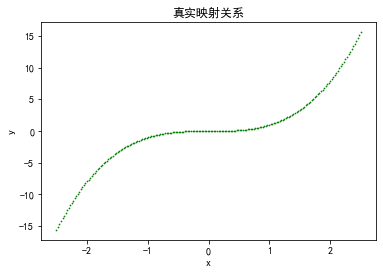

In [16]:
n = 200
x = np.linspace(2.5,-2.5,n)
y = x**3
plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x,y,color="green",s=0.5)
plt.title("真实映射关系")#设置figure名称
plt.show()

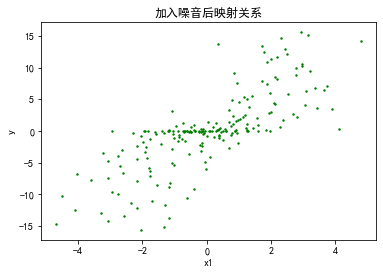

MSE:1.159683327155582


In [17]:
x1 = x+np.random.randn(n)
plt.figure()
plt.xlabel("x1")
plt.ylabel("y")
plt.scatter(x1,y,color="green",s=2)
plt.title("加入噪音后映射关系")#设置figure名称
plt.show()
print(f"MSE:{np.sum((x1-x)**2)/n}")

In [21]:
#lof 去除异常点
# threshold = 2
lof_model = LocalOutlierFactor(n_neighbors=30,p=2)
x11 = x1.reshape(x1.shape[0],1)
y11 = y.reshape(y.shape[0],1)
new_set = np.hstack((x11,y11))
lof_model.fit_predict(new_set)
score = lof_model.negative_outlier_factor_
# score = lof_model._predict()
m = int(len(x1)*0.9)
score_index = np.argsort(abs(score))[0:m]
x1 = x1[score_index]
y = y[score_index]
# x1 = x1[np.where(abs(score)<threshold)]
# y = y[np.where(abs(score)<threshold)]
x1.shape

(180,)

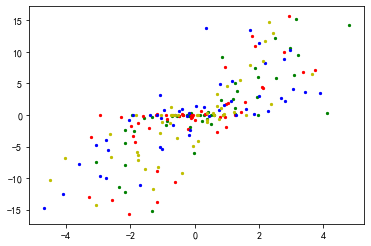

(4, 50)

In [18]:
spoches = 4
index = train(x1,y,spoches)
plt.figure()

a = ["green","red","b","y"]
for i in range(4):
    index1 = np.argsort(x1[index[i]])
    plt.scatter(x1[index[i][index1]],y[index[i][index1]],color=a[i],s=5)
#     plt.title("加入噪音后映射关系")#设置figure名称
plt.show()
index.shape#横向量为每个类别的序号

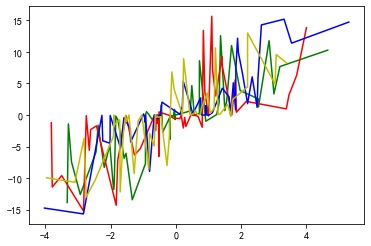

In [9]:
#根据x大小连接
for i in range(4):
    index1 = np.argsort(x1[index[i]])
    plt.plot(x1[index[i][index1]],y[index[i][index1]],color=a[i])
#     plt.title("加入噪音后映射关系")#设置figure名称
plt.show()

In [2]:
#根据x距离填充样本点
x_point=[]
y_point=[]
for k in range(spoches):
    x_set = x1[index[k]]
    y_set = y[index[k]]
    sort_index = np.argsort(x_set)
    for i in range(len(x_set)):
        if i == len(x_set)-1:
            continue
        cha = 100*(x_set[sort_index[i+1]]-x_set[sort_index[i]])
        x_point.append(np.linspace(x_set[sort_index[i]],x_set[sort_index[i+1]],int(cha)))
        y_point.append(np.linspace(y_set[sort_index[i]],y_set[sort_index[i+1]],int(cha)))
for i in x_point:
    x1 = np.hstack((x1,i))
for i in y_point:
    y = np.hstack((y,i))
import math
a,i = 0,0
for i in range(x1.shape[0]):
    a += round((round(y[i]**(1/3),3)-x1[i])**2,3)
    i += 1
    if i ==98:
        break
print(x1.shape)

NameError: name 'spoches' is not defined

In [ ]:
#根据x和y距离填充样本点
x_point=[]
y_point=[]
for k in range(spoches):
    x_set = x1[index[k]]
    y_set = y[index[k]]
    sort_index = np.argsort(x_set)
    for i in range(len(x_set)):
        if i == len(x_set)-1:
            continue
        x_y_set = np.vstack((x_set,y_set)).T
#         cha = 100*(x_set[sort_index[i+1]]-x_set[sort_index[i]])
        cha = 100*(np.linalg.norm(x_y_set[i]-x_y_set[i+1],ord=2,axis=0))
        x_point.append(np.linspace(x_set[sort_index[i]],x_set[sort_index[i+1]],int(cha)))
        y_point.append(np.linspace(y_set[sort_index[i]],y_set[sort_index[i+1]],int(cha)))
for i in x_point:
    x1 = np.hstack((x1,i))
for i in y_point:
    y = np.hstack((y,i))
x1.shape

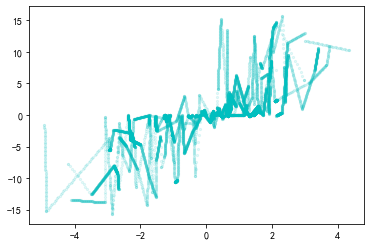

(12636,)

In [68]:
plt.figure()
plt.scatter(x1,y,color="c",s=5,alpha=0.1)
plt.show()
x1.shape

In [1]:
#距离度量加上y
class dyk:
    
    def __init__(self,spoches=4,distance=2,number_parameter=2):
        self.spoches = spoches
        self.distance = distance
        self.number_parameter = number_parameter
        
    def _distance(self,x1,x2):
        if x1.ndim >1 or x2.ndim>1:
            return np.linalg.norm(x1-x2,ord = self.distance,axis=1)
        else:
            return np.linalg.norm(x1-x2,ord = self.distance)
        
    def train(self,x_train,y_train):#dividing k sets
        index_spoches = np.zeros(len(x_train)-len(x_train)%self.spoches)
        index_list = list(range(0,len(x_train)))
        for i in range(len(x_train)-len(x_train)%self.spoches):
            index = np.random.choice(index_list)
            index_spoches[i] = index
            index_list.remove(index)
        self.index_spoches = index_spoches.reshape(self.spoches,
                                                   int((len(x_train)-(len(x_train)%self.spoches))/self.spoches)).astype(int)
        self.x_train = x_train
        self.y_train = y_train
        
    def d_fitting(self):#K-routes filling
        x_point = []
        y_point = []
        for k in range(self.spoches):
            xk_set = self.x_train[self.index_spoches[k]]
            yk_set = self.y_train[self.index_spoches[k]]
            distance = np.linalg.norm(xk_set,ord=self.distance,axis=1)
            #与零点的距离作为排序，确保连线的起点从最接近零点开始
            xk_set = xk_set[np.argsort(distance)]
            yk_set = yk_set[np.argsort(distance)]
            remaining_xset = xk_set
            remaining_yset = yk_set
            for i in range(len(xk_set)):
                if i == len(xk_set)-1:
                    continue
                elif i == 0:
                    point_x = xk_set[i]
                    point_y = yk_set[i]
                    remaining_xset = remaining_xset[1:]
                    remaining_yset = remaining_yset[1:]
                point_x_y = np.hstack((point_x,point_y))
                remaining_x_y = np.hstack((remaining_xset,remaining_yset.reshape(remaining_yset.shape[0],1)))
                distance = self._distance(point_x_y,remaining_x_y)
                min_index = np.argmin(distance)
                x_point.append((np.linspace(point_x,remaining_xset[min_index],int(self.number_parameter*distance[min_index]))))
                y_point.append((np.linspace(point_y,remaining_yset[min_index],int(self.number_parameter*distance[min_index]))))
                point_x = remaining_xset[min_index]
                point_y = remaining_yset[min_index]
                remaining_xset = np.delete(remaining_xset,min_index,axis=0)
                remaining_yset = np.delete(remaining_yset,min_index,axis=0)
        for i in x_point:
            self.x_train = np.vstack((self.x_train,i))
        for i in y_point:
            self.y_train = np.hstack((self.y_train,i))
        
        return self.x_train,self.y_train
    
    def y_adjustment(self,neighbors = 50,threshold = 3.5):#yawing correcting
        a = self.y_train
        lof_model = LocalOutlierFactor(n_neighbors=neighbors,p=self.distance)
        lof_model.fit_predict(np.hstack((self.x_train,a.reshape(len(self.x_train),1))))
        score = lof_model.negative_outlier_factor_
        self.x_train = self.x_train[np.where(abs(score)<threshold)]
        self.y_train = self.y_train[np.where(abs(score)<threshold)]
        
        return self.x_train,self.y_train

In [3]:
#距离度量不算y
class dyk:
    
    def __init__(self,spoches=4,distance=2,number_parameter=2):
        self.spoches = spoches
        self.distance = distance
        self.number_parameter = number_parameter
        
    def _distance(self,x1,x2):
        if x1.ndim >1 or x2.ndim>1:
            return np.linalg.norm(x1-x2,ord = self.distance,axis=1)
        else:
            return np.linalg.norm(x1-x2,ord = self.distance)
        
    def train(self,x_train,y_train):#dividing k sets
        index_spoches = np.zeros(len(x_train)-len(x_train)%self.spoches)
        index_list = list(range(0,len(x_train)))
        for i in range(len(x_train)-len(x_train)%self.spoches):
            index = np.random.choice(index_list)
            index_spoches[i] = index
            index_list.remove(index)
        self.index_spoches = index_spoches.reshape(self.spoches,
                                                   int((len(x_train)-(len(x_train)%self.spoches))/self.spoches)).astype(int)
        self.x_train = x_train
        self.y_train = y_train
        
    def d_fitting(self):#K-routes filling
        x_point = []
        y_point = []
        for k in range(self.spoches):
            xk_set = self.x_train[self.index_spoches[k]]
            yk_set = self.y_train[self.index_spoches[k]]
            distance = np.linalg.norm(xk_set,ord=self.distance,axis=1)
            xk_set = xk_set[np.argsort(distance)]
            yk_set = yk_set[np.argsort(distance)]
            remaining_xset = xk_set
            remaining_yset = yk_set
            for i in range(len(xk_set)):
                if i == len(xk_set)-1:
                    continue
                elif i == 0:
                    point_x = xk_set[i]
                    point_y = yk_set[i]
                    remaining_xset = remaining_xset[1:]
                    remaining_yset = remaining_yset[1:]
                distance = self._distance(point_x,remaining_xset)
                min_index = np.argmin(distance)
                x_point.append((np.linspace(point_x,remaining_xset[min_index],int(self.number_parameter*distance[min_index]))))
                y_point.append((np.linspace(point_y,remaining_yset[min_index],int(self.number_parameter*distance[min_index]))))
                point_x = remaining_xset[min_index]
                point_y = remaining_yset[min_index]
                remaining_xset = np.delete(remaining_xset,min_index,axis=0)
                remaining_yset = np.delete(remaining_yset,min_index,axis=0)
        for i in x_point:
            self.x_train = np.vstack((self.x_train,i))
        for i in y_point:
            self.y_train = np.hstack((self.y_train,i))
        
        return self.x_train,self.y_train
    
    def y_adjustment(self,neighbors = 50,threshold = 3.5):#yawing correcting
        a = self.y_train
        lof_model = LocalOutlierFactor(n_neighbors=neighbors,p=self.distance)
        lof_model.fit_predict(np.hstack((self.x_train,a.reshape(len(self.x_train),1))))
        score = lof_model.negative_outlier_factor_
        self.x_train = self.x_train[np.where(abs(score)<threshold)]
        self.y_train = self.y_train[np.where(abs(score)<threshold)]
        
        return self.x_train,self.y_train

In [98]:
train_data = pd.read_csv("C:\\Users\\duduu\\Desktop\\数据挖掘\\数据挖掘期末大作业\\train.csv")
X = train_data.iloc[:,1:11].values
y = train_data.iloc[:,11].values
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [78]:
from scipy.stats import t
n = 1000
x1 = np.random.normal(0,3,n)
x2 = np.random.uniform(-3,3,n)
x3 = t.rvs(df=5,size=n)
noise = np.random.normal(0,2,(np.int(0.7*n),3))
noise1 = np.random.normal(0,2,(np.int(0.3*n),3))
x = np.vstack((x1,x2,x3)).T
w1 = np.random.randn(3,2)
w2 = np.random.randn(2,1)
y = ((x@w1+1)@w2).reshape(n) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)
x_train = x_train+noise
x_test = x_test+noise1

In [ ]:
# threshold = 1.4
lof_model = LocalOutlierFactor(n_neighbors=50,p=2)
lof_model.fit_predict(np.hstack((x_train,y_train.reshape(len(x_train),1))))
score = lof_model.negative_outlier_factor_
m = int(len(x_train)*0.9)
score_index = np.argsort(abs(score))[0:m]
x_train = x_train[score_index]
y_train = y_train[score_index]

In [ ]:
# threshold = 1.4
lof_model = LocalOutlierFactor(n_neighbors=30,p=2)
lof_model.fit_predict(np.hstack((a1,b1.reshape(len(a1),1))))
score = lof_model.negative_outlier_factor_
a1 = a1[np.where(abs(score)<threshold)]
b1 = b1[np.where(abs(score)<threshold)]

In [103]:
#定义模型，拟合数据
model = dyk(number_parameter=2,spoches=65)
model.train(x_train,y_train)
#dyk优化
a1,b1=model.d_fitting()
print(a1.shape)

(428277, 10)


In [104]:
#knn
from sklearn import neighbors
for k in range(1,401,5):
    modelKNN=neighbors.KNeighborsRegressor(n_neighbors=k,weights='distance')
    modelKNN.fit(a1,b1)
    # modelKNN.fit(x_train,y_train)
    y_pred = modelKNN.predict(x_test)
    print("k:",(k),",  MSE:",(mean_squared_error(y_pred,y_test)))

k: 1 ,  MSE: 17.16869935017013
k: 6 ,  MSE: 16.44526797456202
k: 11 ,  MSE: 15.618083596786784
k: 16 ,  MSE: 14.756150462254237
k: 21 ,  MSE: 13.868454582524873
k: 26 ,  MSE: 13.142697953514743
k: 31 ,  MSE: 12.488120901052266
k: 36 ,  MSE: 11.952765934066058
k: 41 ,  MSE: 11.53791528851994
k: 46 ,  MSE: 11.107249844874428
k: 51 ,  MSE: 10.740753492307787
k: 56 ,  MSE: 10.4926596559748
k: 61 ,  MSE: 10.20489779036478


KeyboardInterrupt: 

In [87]:
#前馈神经网络
from sklearn.neural_network import MLPRegressor
model =MLPRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
mes1 = mean_squared_error(y_pred,y_test)
model =MLPRegressor()
model.fit(a1,b1)
y_pred = model.predict(x_test)
mes2 = mean_squared_error(y_pred,y_test)
print("原数据集MSE:%f\n处理后数据集MSE:%f"%(mes1,mes2))

原数据集MSE:0.743721
处理后数据集MSE:0.831142


In [96]:
#梯度提升决策树
from sklearn.ensemble import GradientBoostingRegressor
for i in range(1,700,50):
    model2 = GradientBoostingRegressor(n_estimators=i)
    # model2.fit(a1,b1)
    model2.fit(x_train,y_train)
    y_pred = model2.predict(x_test)
    mean_squared_error(y_test,y_pred)
    print("loss:%f , n_estimators:%d"%(mean_squared_error(y_test,y_pred),i))

loss:25431.556542 , n_estimators:1
loss:172.822921 , n_estimators:51
loss:125.138677 , n_estimators:101
loss:107.538964 , n_estimators:151
loss:101.537142 , n_estimators:201
loss:99.378412 , n_estimators:251
loss:95.634760 , n_estimators:301
loss:91.767843 , n_estimators:351
loss:92.504417 , n_estimators:401
loss:90.929376 , n_estimators:451
loss:89.029225 , n_estimators:501
loss:87.581331 , n_estimators:551
loss:89.669551 , n_estimators:601
loss:86.005566 , n_estimators:651


In [97]:
#随机森林
from sklearn.ensemble import RandomForestRegressor
for i in range(105,300,5):
    regressor = RandomForestRegressor(n_estimators=i, random_state=0)
    # regressor.fit(a1, b1)
    regressor.fit(x_train,y_train)
    y_pred = regressor.predict(x_test)
    print("loss:%f , n_estimators:%d"%(mean_squared_error(y_test,y_pred),i))

loss:232.308169 , n_estimators:105
loss:232.857770 , n_estimators:110
loss:235.517779 , n_estimators:115
loss:235.568773 , n_estimators:120
loss:238.577095 , n_estimators:125
loss:237.090260 , n_estimators:130
loss:230.351259 , n_estimators:135
loss:231.669879 , n_estimators:140
loss:231.650362 , n_estimators:145
loss:231.122929 , n_estimators:150
loss:230.008847 , n_estimators:155
loss:228.194553 , n_estimators:160
loss:228.503610 , n_estimators:165
loss:228.124125 , n_estimators:170
loss:229.143171 , n_estimators:175
loss:228.141427 , n_estimators:180
loss:228.876779 , n_estimators:185
loss:229.140902 , n_estimators:190
loss:229.397248 , n_estimators:195
loss:229.827216 , n_estimators:200
loss:230.173471 , n_estimators:205
loss:228.285007 , n_estimators:210


KeyboardInterrupt: 

In [72]:
from sklearn.svm import SVR
model1 = SVR(kernel="linear")
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
mse1 = mean_squared_error(y_test,y_pred)
model1 = SVR(kernel="linear")
model1.fit(a1,b1)
y_pred=model1.predict(x_test)
mse2 = mean_squared_error(y_test,y_pred)
print("原数据集MES:%f\n处理后数据集MSE:%f"%(mse1,mse2))

原数据集MES:0.508153
处理后数据集MSE:0.505997
